In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
import warnings
warnings.filterwarnings(action='ignore') 

In [2]:
data_all = pd.read_csv("./데이터/2. 선정기업자료.csv",encoding='cp949',index_col=0)
backtest_all = pd.read_csv("./데이터/2. 주식데이터.csv",encoding='cp949',index_col=0)
kosdaq = pd.read_csv("./데이터/1. 코스닥 데이터.csv",encoding='cp949')

In [3]:
data_all 

,회사명,거래소코드,회계년도,상장일,상장폐지일,소속코드,산업명,자기자본증가율,총자본증가율,매출액순이익률,...,매출액순이익률_점수,자기자본순이익률_점수,총자본사업이익률_점수,총자본순이익률_점수,순운전자본비율_점수,자기자본구성비율_점수,자기자본배율_점수,매출채권회전기간_점수,순운전자본회전률_점수,부가가치율_점수
0,(주)CMG제약,58820,2011-12-01,2001-08-31,NaN,5,의료용 물질 및 의약품 제조업,-2.02,1.98,-8.50,...,2.0,2.0,4.0,2.0,7.0,7.0,1.0,1.0,4.0,5.0
1,(주)ES큐브,50120,2011-12-01,2002-04-25,NaN,5,도매 및 상품 중개업,-7.92,12.78,-8.99,...,2.0,2.0,2.0,2.0,8.0,8.0,2.0,4.0,6.0,6.0
2,(주)가비아,79940,2011-12-01,2005-10-19,NaN,5,출판업,30.73,22.76,13.28,...,9.0,9.0,9.0,10.0,6.0,8.0,3.0,10.0,8.0,10.0
3,(주)고영테크놀러지,98460,2011-12-01,2008-06-03,NaN,5,기타 기계 및 장비 제조업,26.23,23.10,18.15,...,10.0,10.0,10.0,10.0,10.0,9.0,9.0,3.0,7.0,8.0
4,(주)골드앤에스,35290,2011-12-01,1999-12-07,NaN,5,출판업,3.73,3.62,2.11,...,5.0,5.0,5.0,5.0,3.0,4.0,1.0,7.0,6.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,현우산업(주),92300,2020-12-01,2007-10-24,NaN,5,"전자부품, 컴퓨터, 영상, 음향 및 통신장비 제조업",-0.34,4.88,0.73,...,5.0,5.0,4.0,5.0,5.0,3.0,6.0,6.0,8.0,5.0
632,화성밸브(주),39610,2020-12-01,2000-03-16,NaN,5,기타 기계 및 장비 제조업,2.71,5.94,-0.36,...,4.0,4.0,3.0,4.0,8.0,10.0,5.0,2.0,8.0,3.0
633,화일약품(주),61250,2020-12-01,2002-04-18,NaN,5,의료용 물질 및 의약품 제조업,31.34,21.72,-45.71,...,1.0,1.0,4.0,1.0,1.0,2.0,3.0,6.0,4.0,1.0
634,휴림로봇(주),90710,2020-12-01,2006-12-05,NaN,5,기타 기계 및 장비 제조업,166.38,217.64,197.71,...,10.0,10.0,1.0,10.0,2.0,5.0,3.0,2.0,1.0,10.0


In [4]:
data_all[["회사명",'총점수', '자기자본증가율_점수', '총자본증가율_점수', '매출액순이익률_점수',
       '자기자본순이익률_점수', '총자본사업이익률_점수', '총자본순이익률_점수', '순운전자본비율_점수', '자기자본구성비율_점수',
       '자기자본배율_점수', '매출채권회전기간_점수', '순운전자본회전률_점수', '부가가치율_점수']]

,회사명,총점수,자기자본증가율_점수,총자본증가율_점수,매출액순이익률_점수,자기자본순이익률_점수,총자본사업이익률_점수,총자본순이익률_점수,순운전자본비율_점수,자기자본구성비율_점수,자기자본배율_점수,매출채권회전기간_점수,순운전자본회전률_점수,부가가치율_점수
0,(주)CMG제약,42.0,3.0,4.0,2.0,2.0,4.0,2.0,7.0,7.0,1.0,1.0,4.0,5.0
1,(주)ES큐브,51.0,2.0,7.0,2.0,2.0,2.0,2.0,8.0,8.0,2.0,4.0,6.0,6.0
2,(주)가비아,101.0,10.0,9.0,9.0,9.0,9.0,10.0,6.0,8.0,3.0,10.0,8.0,10.0
3,(주)고영테크놀러지,104.0,9.0,9.0,10.0,10.0,10.0,10.0,10.0,9.0,9.0,3.0,7.0,8.0
4,(주)골드앤에스,58.0,5.0,4.0,5.0,5.0,5.0,5.0,3.0,4.0,1.0,7.0,6.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,현우산업(주),61.0,3.0,6.0,5.0,5.0,4.0,5.0,5.0,3.0,6.0,6.0,8.0,5.0
632,화성밸브(주),62.0,5.0,6.0,4.0,4.0,3.0,4.0,8.0,10.0,5.0,2.0,8.0,3.0
633,화일약품(주),42.0,9.0,9.0,1.0,1.0,4.0,1.0,1.0,2.0,3.0,6.0,4.0,1.0
634,휴림로봇(주),74.0,10.0,10.0,10.0,10.0,1.0,10.0,2.0,5.0,3.0,2.0,1.0,10.0


In [5]:
top30_2011 = data_all[data_all["투자년도"]==2011].sort_values("총점수",ascending=False)[:30]
top30_2012 = data_all[data_all["투자년도"]==2012].sort_values("총점수",ascending=False)[:30]
top30_2013 = data_all[data_all["투자년도"]==2013].sort_values("총점수",ascending=False)[:30]
top30_2014 = data_all[data_all["투자년도"]==2014].sort_values("총점수",ascending=False)[:30]
top30_2015 = data_all[data_all["투자년도"]==2015].sort_values("총점수",ascending=False)[:30]
top30_2016 = data_all[data_all["투자년도"]==2016].sort_values("총점수",ascending=False)[:30]
top30_2017 = data_all[data_all["투자년도"]==2017].sort_values("총점수",ascending=False)[:30]
top30_2018 = data_all[data_all["투자년도"]==2018].sort_values("총점수",ascending=False)[:30]
top30_2019 = data_all[data_all["투자년도"]==2019].sort_values("총점수",ascending=False)[:30]
top30_2020 = data_all[data_all["투자년도"]==2020].sort_values("총점수",ascending=False)[:30]


In [6]:
top30_30_2011 = data_all[data_all["투자년도"]==2011].sort_values("총점수",ascending=False)[20:30]
top30_30_2012 = data_all[data_all["투자년도"]==2012].sort_values("총점수",ascending=False)[20:30]
top30_30_2013 = data_all[data_all["투자년도"]==2013].sort_values("총점수",ascending=False)[20:30]
top30_30_2014 = data_all[data_all["투자년도"]==2014].sort_values("총점수",ascending=False)[20:30]
top30_30_2015 = data_all[data_all["투자년도"]==2015].sort_values("총점수",ascending=False)[20:30]
top30_30_2016 = data_all[data_all["투자년도"]==2016].sort_values("총점수",ascending=False)[20:30]
top30_30_2017 = data_all[data_all["투자년도"]==2017].sort_values("총점수",ascending=False)[20:30]
top30_30_2018 = data_all[data_all["투자년도"]==2018].sort_values("총점수",ascending=False)[20:30]
top30_30_2019 = data_all[data_all["투자년도"]==2019].sort_values("총점수",ascending=False)[20:30]
top30_30_2020 = data_all[data_all["투자년도"]==2020].sort_values("총점수",ascending=False)[20:30]

In [7]:
top30_30_2020

,회사명,거래소코드,회계년도,상장일,상장폐지일,소속코드,산업명,자기자본증가율,총자본증가율,매출액순이익률,...,매출액순이익률_점수,자기자본순이익률_점수,총자본사업이익률_점수,총자본순이익률_점수,순운전자본비율_점수,자기자본구성비율_점수,자기자본배율_점수,매출채권회전기간_점수,순운전자본회전률_점수,부가가치율_점수
225,(주)엠게임,58630,2020-12-01,2008-12-19,NaN,5,출판업,16.18,17.56,16.36,...,9.0,9.0,10.0,10.0,8.0,9.0,4.0,8.0,9.0,9.0
14,(주)금화피에스시,36190,2020-12-01,2000-12-26,NaN,5,전문직별 공사업,7.58,4.40,12.72,...,9.0,8.0,9.0,9.0,9.0,10.0,10.0,9.0,7.0,10.0
448,고려제약(주),14570,2020-12-01,2000-12-07,NaN,5,의료용 물질 및 의약품 제조업,8.95,9.88,11.37,...,9.0,9.0,10.0,10.0,9.0,10.0,9.0,6.0,9.0,6.0
311,(주)제이와이피엔터테인먼트,35900,2020-12-01,2001-08-30,NaN,5,영상ㆍ오디오 기록물 제작 및 배급업,14.72,7.75,20.52,...,10.0,10.0,10.0,10.0,9.0,9.0,6.0,8.0,5.0,9.0
531,에스씨아이평가정보(주),36120,2020-12-01,1999-12-07,NaN,5,정보서비스업,16.37,11.75,12.52,...,9.0,10.0,10.0,10.0,10.0,8.0,1.0,9.0,9.0,9.0
290,(주)이크레더블,92130,2020-12-01,2008-10-24,NaN,5,정보서비스업,7.70,7.75,30.42,...,10.0,10.0,10.0,10.0,10.0,9.0,5.0,9.0,4.0,10.0
456,나이스평가정보(주),30190,2020-12-01,2000-05-16,NaN,5,정보서비스업,15.44,15.58,10.58,...,9.0,10.0,10.0,10.0,7.0,7.0,5.0,9.0,9.0,9.0
219,(주)엑시콘,92870,2020-12-01,2015-10-22,NaN,5,기타 기계 및 장비 제조업,31.05,13.14,18.02,...,10.0,9.0,8.0,9.0,7.0,9.0,8.0,9.0,6.0,8.0
178,(주)아프리카티비,67160,2020-12-01,2003-12-19,NaN,5,출판업,21.16,27.78,18.45,...,10.0,10.0,10.0,10.0,6.0,4.0,9.0,10.0,4.0,9.0
614,한국알콜산업(주),17890,2020-12-01,1992-08-04,NaN,5,화학물질 및 화학제품 제조업; 의약품 제외,13.91,13.12,14.09,...,9.0,9.0,10.0,10.0,6.0,8.0,10.0,5.0,10.0,7.0


In [8]:
pd.concat([top30_30_2011,top30_30_2012,top30_30_2013,top30_30_2014,top30_30_2015,top30_30_2016,top30_30_2017,top30_30_2018,top30_30_2019,top30_30_2020]).mean()


거래소코드          54748.0000
상장폐지일                 NaN
소속코드               5.0000
자기자본증가율           28.5126
총자본증가율            22.6725
매출액순이익률           15.2376
자기자본순이익률          18.2747
총자본사업이익률          16.2308
총자본순이익률           12.8980
순운전자본비율           38.1763
자기자본구성비율          74.7995
자기자본배율          2708.3351
매출채권회전기간          43.9462
순운전자본회전률           1.2669
부가가치율             41.3129
label              0.0000
투자년도            2015.5000
티커             54748.0000
총점수               99.8100
자기자본증가율_점수         8.1700
총자본증가율_점수          7.8800
매출액순이익률_점수         9.2200
자기자본순이익률_점수        9.1500
총자본사업이익률_점수        9.5800
총자본순이익률_점수         9.6300
순운전자본비율_점수         7.6600
자기자본구성비율_점수        7.8700
자기자본배율_점수          7.7900
매출채권회전기간_점수        7.6700
순운전자본회전률_점수        6.8000
부가가치율_점수           8.3900
dtype: float64

In [9]:
pd.concat([top30_2011,top30_2012,top30_2013,top30_2014,top30_2015,top30_2016,top30_2017,top30_2018,top30_2019,top30_2020]).mean()


거래소코드          60508.966667
소속코드               5.006667
자기자본증가율           33.458200
총자본증가율            29.574167
매출액순이익률           17.526100
자기자본순이익률          21.396433
총자본사업이익률          19.650733
총자본순이익률           16.045767
순운전자본비율           42.467967
자기자본구성비율          78.330800
자기자본배율          2580.196200
매출채권회전기간          41.913200
순운전자본회전률           1.344233
부가가치율             43.190000
label              0.006667
투자년도            2015.500000
티커             60508.966667
총점수              103.473333
자기자본증가율_점수         8.476667
총자본증가율_점수          8.363333
매출액순이익률_점수         9.420000
자기자본순이익률_점수        9.446667
총자본사업이익률_점수        9.733333
총자본순이익률_점수         9.813333
순운전자본비율_점수         8.230000
자기자본구성비율_점수        8.423333
자기자본배율_점수          7.970000
매출채권회전기간_점수        7.853333
순운전자본회전률_점수        7.166667
부가가치율_점수           8.576667
dtype: float64

In [10]:
backtest_2011 = backtest_all[backtest_all["Date"].str.contains('2011')]
backtest_2012 = backtest_all[backtest_all["Date"].str.contains('2012')]
backtest_2013 = backtest_all[backtest_all["Date"].str.contains('2013')]
backtest_2014 = backtest_all[backtest_all["Date"].str.contains('2014')]
backtest_2015 = backtest_all[backtest_all["Date"].str.contains('2015')]
backtest_2016 = backtest_all[backtest_all["Date"].str.contains('2016')]
backtest_2017 = backtest_all[backtest_all["Date"].str.contains('2017')]
backtest_2018 = backtest_all[backtest_all["Date"].str.contains('2018')]
backtest_2019 = backtest_all[backtest_all["Date"].str.contains('2019')]
backtest_2020 = backtest_all[backtest_all["Date"].str.contains('2020')]

In [11]:
kosdaq_2011 = kosdaq[kosdaq["Date"].str.contains('2011')].set_index('Date')
kosdaq_2012 = kosdaq[kosdaq["Date"].str.contains('2012')].set_index('Date')
kosdaq_2013 = kosdaq[kosdaq["Date"].str.contains('2013')].set_index('Date')
kosdaq_2014 = kosdaq[kosdaq["Date"].str.contains('2014')].set_index('Date')
kosdaq_2015 = kosdaq[kosdaq["Date"].str.contains('2015')].set_index('Date')
kosdaq_2016 = kosdaq[kosdaq["Date"].str.contains('2016')].set_index('Date')
kosdaq_2017 = kosdaq[kosdaq["Date"].str.contains('2017')].set_index('Date')
kosdaq_2018 = kosdaq[kosdaq["Date"].str.contains('2018')].set_index('Date')
kosdaq_2019 = kosdaq[kosdaq["Date"].str.contains('2019')].set_index('Date')
kosdaq_2020 = kosdaq[kosdaq["Date"].str.contains('2020')].set_index('Date')

In [12]:
top30_2011_data = pd.merge(backtest_2011, top30_2011, how='right',on ='회사명')
top30_2012_data = pd.merge(backtest_2012, top30_2012, how='right',on ='회사명')
top30_2013_data = pd.merge(backtest_2013, top30_2013, how='right',on ='회사명')
top30_2014_data = pd.merge(backtest_2014, top30_2014, how='right',on ='회사명')
top30_2015_data = pd.merge(backtest_2015, top30_2015, how='right',on ='회사명')
top30_2016_data = pd.merge(backtest_2016, top30_2016, how='right',on ='회사명')
top30_2017_data = pd.merge(backtest_2017, top30_2017, how='right',on ='회사명')
top30_2018_data = pd.merge(backtest_2018, top30_2018, how='right',on ='회사명')
top30_2019_data = pd.merge(backtest_2019, top30_2019, how='right',on ='회사명')
top30_2020_data = pd.merge(backtest_2020, top30_2020, how='right',on ='회사명')


In [13]:
col = ['회사명',"Date",'총점수', '자기자본증가율_점수', '총자본증가율_점수', '매출액순이익률_점수',
       '자기자본순이익률_점수', '총자본사업이익률_점수', '총자본순이익률_점수', '순운전자본비율_점수', '자기자본구성비율_점수',
       '자기자본배율_점수', '매출채권회전기간_점수', '순운전자본회전률_점수', '부가가치율_점수','Close']

In [14]:
top30_2011_data =top30_2011_data[col] 
top30_2012_data =top30_2012_data[col] 
top30_2013_data =top30_2013_data[col] 
top30_2014_data =top30_2014_data[col] 
top30_2015_data =top30_2015_data[col] 
top30_2016_data =top30_2016_data[col] 
top30_2017_data =top30_2017_data[col] 
top30_2018_data =top30_2018_data[col] 
top30_2019_data =top30_2019_data[col] 
top30_2020_data =top30_2020_data[col] 

In [15]:
top30_2011_data["회사명"].unique()

array(['메가스터디(주)', '(주)아즈텍더블유비이', '(주)빅솔론', '(주)에이스침대', '(주)제주반도체',
       '(주)컴투스홀딩스', '대한광통신(주)', '(주)티브로드한빛방송', '(주)카카오', '(주)유진테크',
       '(주)다원시스', '(주)포스코케미칼', '유비벨록스(주)', '(주)이노와이어리스', '(주)태광',
       '(주)고영테크놀러지', '에스맥(주)', '(주)아이에스시', '(주)모다이노칩', '(주)지에스이',
       '(주)에스엠엔터테인먼트', '(주)테스', '(주)가비아', '(주)에스에프에이', '(주)쎌바이오텍',
       '(주)휴비츠', '(주)인바디', '(주)네오위즈', '이화공영(주)', '한국전자인증(주)'],
      dtype=object)

In [16]:
name_list_2011 = top30_2011_data["회사명"].unique()
name_list_2012 = top30_2012_data["회사명"].unique()
name_list_2013 = top30_2013_data["회사명"].unique()
name_list_2014 = top30_2014_data["회사명"].unique()
name_list_2015 = top30_2015_data["회사명"].unique()
name_list_2016 = top30_2016_data["회사명"].unique()
name_list_2017 = top30_2017_data["회사명"].unique()
name_list_2018 = top30_2018_data["회사명"].unique()
name_list_2019 = top30_2019_data["회사명"].unique()
name_list_2020 = top30_2020_data["회사명"].unique()

In [17]:
top30_2011_data

,회사명,Date,총점수,자기자본증가율_점수,총자본증가율_점수,매출액순이익률_점수,자기자본순이익률_점수,총자본사업이익률_점수,총자본순이익률_점수,순운전자본비율_점수,자기자본구성비율_점수,자기자본배율_점수,매출채권회전기간_점수,순운전자본회전률_점수,부가가치율_점수,Close
0,메가스터디(주),2011-01-03,109.0,9.0,8.0,10.0,10.0,10.0,10.0,8.0,9.0,10.0,10.0,6.0,9.0,30744
1,메가스터디(주),2011-01-04,109.0,9.0,8.0,10.0,10.0,10.0,10.0,8.0,9.0,10.0,10.0,6.0,9.0,31739
2,메가스터디(주),2011-01-05,109.0,9.0,8.0,10.0,10.0,10.0,10.0,8.0,9.0,10.0,10.0,6.0,9.0,32161
3,메가스터디(주),2011-01-06,109.0,9.0,8.0,10.0,10.0,10.0,10.0,8.0,9.0,10.0,10.0,6.0,9.0,32330
4,메가스터디(주),2011-01-07,109.0,9.0,8.0,10.0,10.0,10.0,10.0,8.0,9.0,10.0,10.0,6.0,9.0,32364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7435,한국전자인증(주),2011-12-23,99.0,6.0,7.0,10.0,9.0,10.0,10.0,10.0,10.0,9.0,4.0,4.0,10.0,1380
7436,한국전자인증(주),2011-12-26,99.0,6.0,7.0,10.0,9.0,10.0,10.0,10.0,10.0,9.0,4.0,4.0,10.0,1380
7437,한국전자인증(주),2011-12-27,99.0,6.0,7.0,10.0,9.0,10.0,10.0,10.0,10.0,9.0,4.0,4.0,10.0,1350
7438,한국전자인증(주),2011-12-28,99.0,6.0,7.0,10.0,9.0,10.0,10.0,10.0,10.0,9.0,4.0,4.0,10.0,1340


In [18]:
top30_2011_data = top30_2011_data[["Date","Close","회사명"]]
top30_2011_data.set_index("Date",inplace=True)
top30_2012_data = top30_2012_data[["Date","Close","회사명"]]
top30_2012_data.set_index("Date",inplace=True)
top30_2013_data = top30_2013_data[["Date","Close","회사명"]]
top30_2013_data.set_index("Date",inplace=True)
top30_2014_data = top30_2014_data[["Date","Close","회사명"]]
top30_2014_data.set_index("Date",inplace=True)
top30_2015_data = top30_2015_data[["Date","Close","회사명"]]
top30_2015_data.set_index("Date",inplace=True)
top30_2016_data = top30_2016_data[["Date","Close","회사명"]]
top30_2016_data.set_index("Date",inplace=True)
top30_2017_data = top30_2017_data[["Date","Close","회사명"]]
top30_2017_data.set_index("Date",inplace=True)
top30_2018_data = top30_2018_data[["Date","Close","회사명"]]
top30_2018_data.set_index("Date",inplace=True)
top30_2019_data = top30_2019_data[["Date","Close","회사명"]]
top30_2019_data.set_index("Date",inplace=True)
top30_2020_data = top30_2020_data[["Date","Close","회사명"]]
top30_2020_data.set_index("Date",inplace=True)

In [19]:
top30_2011_pct = pd.DataFrame()
top30_2011_pct.index = top30_2011_data.index
top30_2012_pct = pd.DataFrame()
top30_2012_pct.index = top30_2012_data.index
top30_2013_pct = pd.DataFrame()
top30_2013_pct.index = top30_2013_data.index
top30_2014_pct = pd.DataFrame()
top30_2014_pct.index = top30_2014_data.index
top30_2015_pct = pd.DataFrame()
top30_2015_pct.index = top30_2015_data.index
top30_2016_pct = pd.DataFrame()
top30_2016_pct.index = top30_2016_data.index
top30_2017_pct = pd.DataFrame()
top30_2017_pct.index = top30_2017_data.index
top30_2018_pct = pd.DataFrame()
top30_2018_pct.index = top30_2018_data.index
top30_2019_pct = pd.DataFrame()
top30_2019_pct.index = top30_2019_data.index
top30_2020_pct = pd.DataFrame()
top30_2020_pct.index = top30_2020_data.index

In [20]:
for i in name_list_2011:
    top30_2011_pct[i] = top30_2011_data[top30_2011_data["회사명"]==i]["Close"]
    top30_2011_pct[i] =top30_2011_pct[i]/top30_2011_pct[i][0]
top30_2011_pct["포트폴리오 누적수익률"] = top30_2011_pct[name_list_2011[0]]
for i in name_list_2011:
        top30_2011_pct["포트폴리오 누적수익률"] = top30_2011_pct[i] + top30_2011_pct["포트폴리오 누적수익률"]

top30_2011_pct["포트폴리오 누적수익률"] = top30_2011_pct["포트폴리오 누적수익률"] - top30_2011_pct[name_list_2011[0]]
top30_2011_pct["포트폴리오 누적수익률"] = top30_2011_pct["포트폴리오 누적수익률"]/30
top30_2011_pct["포트폴리오 누적수익률"] = top30_2011_pct["포트폴리오 누적수익률"]
top30_2011_pct['포트폴리오 일일수익률'] = top30_2011_pct['포트폴리오 누적수익률'].pct_change()

In [21]:
for i in name_list_2012:
    top30_2012_pct[i] = top30_2012_data[top30_2012_data["회사명"]==i]["Close"]
    top30_2012_pct[i] =top30_2012_pct[i]/top30_2012_pct[i][0]
top30_2012_pct["포트폴리오 누적수익률"] = top30_2012_pct[name_list_2012[0]]
for i in name_list_2012:
        top30_2012_pct["포트폴리오 누적수익률"] = top30_2012_pct[i] + top30_2012_pct["포트폴리오 누적수익률"]

top30_2012_pct["포트폴리오 누적수익률"] = top30_2012_pct["포트폴리오 누적수익률"] - top30_2012_pct[name_list_2012[0]]
top30_2012_pct["포트폴리오 누적수익률"] = top30_2012_pct["포트폴리오 누적수익률"]/30
top30_2012_pct["포트폴리오 누적수익률"] = top30_2012_pct["포트폴리오 누적수익률"]
top30_2012_pct['포트폴리오 일일수익률'] = top30_2012_pct['포트폴리오 누적수익률'].pct_change()


In [22]:
for i in name_list_2013:
    top30_2013_pct[i] = top30_2013_data[top30_2013_data["회사명"]==i]["Close"]
    top30_2013_pct[i] =top30_2013_pct[i]/top30_2013_pct[i][0]
top30_2013_pct["포트폴리오 누적수익률"] = top30_2013_pct[name_list_2013[0]]
for i in name_list_2013:
        top30_2013_pct["포트폴리오 누적수익률"] = top30_2013_pct[i] + top30_2013_pct["포트폴리오 누적수익률"]

top30_2013_pct["포트폴리오 누적수익률"] = top30_2013_pct["포트폴리오 누적수익률"] - top30_2013_pct[name_list_2013[0]]
top30_2013_pct["포트폴리오 누적수익률"] = top30_2013_pct["포트폴리오 누적수익률"]/30
top30_2013_pct["포트폴리오 누적수익률"] = top30_2013_pct["포트폴리오 누적수익률"]
top30_2013_pct['포트폴리오 일일수익률'] = top30_2013_pct['포트폴리오 누적수익률'].pct_change()


In [23]:
for i in name_list_2014:
    top30_2014_pct[i] = top30_2014_data[top30_2014_data["회사명"]==i]["Close"]
    top30_2014_pct[i] =top30_2014_pct[i]/top30_2014_pct[i][0]
top30_2014_pct["포트폴리오 누적수익률"] = top30_2014_pct[name_list_2014[0]]
for i in name_list_2014:
        top30_2014_pct["포트폴리오 누적수익률"] = top30_2014_pct[i] + top30_2014_pct["포트폴리오 누적수익률"]

top30_2014_pct["포트폴리오 누적수익률"] = top30_2014_pct["포트폴리오 누적수익률"] - top30_2014_pct[name_list_2014[0]]
top30_2014_pct["포트폴리오 누적수익률"] = top30_2014_pct["포트폴리오 누적수익률"]/30
top30_2014_pct["포트폴리오 누적수익률"] = top30_2014_pct["포트폴리오 누적수익률"]
top30_2014_pct['포트폴리오 일일수익률'] = top30_2014_pct['포트폴리오 누적수익률'].pct_change()


In [24]:
for i in name_list_2015:
    top30_2015_pct[i] = top30_2015_data[top30_2015_data["회사명"]==i]["Close"]
    top30_2015_pct[i] =top30_2015_pct[i]/top30_2015_pct[i][0]
top30_2015_pct["포트폴리오 누적수익률"] = top30_2015_pct[name_list_2015[0]]
for i in name_list_2015:
        top30_2015_pct["포트폴리오 누적수익률"] = top30_2015_pct[i] + top30_2015_pct["포트폴리오 누적수익률"]

top30_2015_pct["포트폴리오 누적수익률"] = top30_2015_pct["포트폴리오 누적수익률"] - top30_2015_pct[name_list_2015[0]]
top30_2015_pct["포트폴리오 누적수익률"] = top30_2015_pct["포트폴리오 누적수익률"]/30
top30_2015_pct["포트폴리오 누적수익률"] = top30_2015_pct["포트폴리오 누적수익률"]
top30_2015_pct['포트폴리오 일일수익률'] = top30_2015_pct['포트폴리오 누적수익률'].pct_change()


In [25]:
for i in name_list_2016:
    top30_2016_pct[i] = top30_2016_data[top30_2016_data["회사명"]==i]["Close"]
    top30_2016_pct[i] =top30_2016_pct[i]/top30_2016_pct[i][0]
top30_2016_pct["포트폴리오 누적수익률"] = top30_2016_pct[name_list_2016[0]]
for i in name_list_2016:
        top30_2016_pct["포트폴리오 누적수익률"] = top30_2016_pct[i] + top30_2016_pct["포트폴리오 누적수익률"]

top30_2016_pct["포트폴리오 누적수익률"] = top30_2016_pct["포트폴리오 누적수익률"] - top30_2016_pct[name_list_2016[0]]
top30_2016_pct["포트폴리오 누적수익률"] = top30_2016_pct["포트폴리오 누적수익률"]/30
top30_2016_pct["포트폴리오 누적수익률"] = top30_2016_pct["포트폴리오 누적수익률"]
top30_2016_pct['포트폴리오 일일수익률'] = top30_2016_pct['포트폴리오 누적수익률'].pct_change()


In [26]:
for i in name_list_2017:
    top30_2017_pct[i] = top30_2017_data[top30_2017_data["회사명"]==i]["Close"]
    top30_2017_pct[i] =top30_2017_pct[i]/top30_2017_pct[i][0]
top30_2017_pct["포트폴리오 누적수익률"] = top30_2017_pct[name_list_2017[0]]
for i in name_list_2017:
        top30_2017_pct["포트폴리오 누적수익률"] = top30_2017_pct[i] + top30_2017_pct["포트폴리오 누적수익률"]

top30_2017_pct["포트폴리오 누적수익률"] = top30_2017_pct["포트폴리오 누적수익률"] - top30_2017_pct[name_list_2017[0]]
top30_2017_pct["포트폴리오 누적수익률"] = top30_2017_pct["포트폴리오 누적수익률"]/30
top30_2017_pct["포트폴리오 누적수익률"] = top30_2017_pct["포트폴리오 누적수익률"]
top30_2017_pct['포트폴리오 일일수익률'] = top30_2017_pct['포트폴리오 누적수익률'].pct_change()


In [27]:
for i in name_list_2018:
    top30_2018_pct[i] = top30_2018_data[top30_2018_data["회사명"]==i]["Close"]
    top30_2018_pct[i] =top30_2018_pct[i]/top30_2018_pct[i][0]
top30_2018_pct["포트폴리오 누적수익률"] = top30_2018_pct[name_list_2018[0]]
for i in name_list_2018:
        top30_2018_pct["포트폴리오 누적수익률"] = top30_2018_pct[i] + top30_2018_pct["포트폴리오 누적수익률"]

top30_2018_pct["포트폴리오 누적수익률"] = top30_2018_pct["포트폴리오 누적수익률"] - top30_2018_pct[name_list_2018[0]]
top30_2018_pct["포트폴리오 누적수익률"] = top30_2018_pct["포트폴리오 누적수익률"]/30
top30_2018_pct["포트폴리오 누적수익률"] = top30_2018_pct["포트폴리오 누적수익률"]
top30_2018_pct['포트폴리오 일일수익률'] = top30_2018_pct['포트폴리오 누적수익률'].pct_change()


In [28]:
for i in name_list_2019:
    top30_2019_pct[i] = top30_2019_data[top30_2019_data["회사명"]==i]["Close"]
    top30_2019_pct[i] =top30_2019_pct[i]/top30_2019_pct[i][0]
top30_2019_pct["포트폴리오 누적수익률"] = top30_2019_pct[name_list_2019[0]]
for i in name_list_2019:
        top30_2019_pct["포트폴리오 누적수익률"] = top30_2019_pct[i] + top30_2019_pct["포트폴리오 누적수익률"]

top30_2019_pct["포트폴리오 누적수익률"] = top30_2019_pct["포트폴리오 누적수익률"] - top30_2019_pct[name_list_2019[0]]
top30_2019_pct["포트폴리오 누적수익률"] = top30_2019_pct["포트폴리오 누적수익률"]/30
top30_2019_pct["포트폴리오 누적수익률"] = top30_2019_pct["포트폴리오 누적수익률"]
top30_2019_pct['포트폴리오 일일수익률'] = top30_2019_pct['포트폴리오 누적수익률'].pct_change()


In [29]:
for i in name_list_2020:
    top30_2020_pct[i] = top30_2020_data[top30_2020_data["회사명"]==i]["Close"]
    top30_2020_pct[i] =top30_2020_pct[i]/top30_2020_pct[i][0]
top30_2020_pct["포트폴리오 누적수익률"] = top30_2020_pct[name_list_2020[0]]
for i in name_list_2020:
        top30_2020_pct["포트폴리오 누적수익률"] = top30_2020_pct[i] + top30_2020_pct["포트폴리오 누적수익률"]

top30_2020_pct["포트폴리오 누적수익률"] = top30_2020_pct["포트폴리오 누적수익률"] - top30_2020_pct[name_list_2020[0]]
top30_2020_pct["포트폴리오 누적수익률"] = top30_2020_pct["포트폴리오 누적수익률"]/30
top30_2020_pct["포트폴리오 누적수익률"] = top30_2020_pct["포트폴리오 누적수익률"]
top30_2020_pct['포트폴리오 일일수익률'] = top30_2020_pct['포트폴리오 누적수익률'].pct_change()


In [30]:
kosdaq["Close"]

0       518.049988
1       521.349976
2       523.809998
3       527.640015
4       530.840027
           ...    
3034    850.210022
3035    842.830017
3036    855.609985
3037    843.179993
3038    845.059998
Name: Close, Length: 3039, dtype: float64

In [31]:
kosdaq_2012

,Open,High,Low,Close,Adj Close,Volume,수익률
Date,,,,,,,
2012-01-02,504.410004,506.829987,502.690002,506.790009,506.790009,433400.0,0.013215
2012-01-03,509.980011,513.849976,509.839996,513.830017,513.830017,591000.0,0.013891
2012-01-04,517.460022,519.479980,516.200012,516.299988,516.299988,652100.0,0.004807
2012-01-05,520.140015,524.369995,519.109985,521.960022,521.960022,654300.0,0.010963
2012-01-06,525.039978,525.039978,515.090027,518.940002,518.940002,626000.0,-0.005786
...,...,...,...,...,...,...,...
2012-12-21,480.410004,481.399994,475.709991,478.059998,478.059998,333400.0,-0.002400
2012-12-24,479.649994,485.369995,479.649994,483.760010,483.760010,297300.0,0.011923
2012-12-26,486.579987,487.600006,482.760010,482.760010,482.760010,327800.0,-0.002067


In [32]:
top30_2011_pct["kosdaq"] = kosdaq_2011["수익률"]
top30_2011_pct["kosdaq 일일수익률"] = kosdaq_2011["수익률"]+1
top30_2011_pct["kosdaq 누적수익률"] = kosdaq_2011["Close"]/kosdaq_2011["Close"][0]
top30_2012_pct["kosdaq"] = kosdaq_2012["수익률"]
top30_2012_pct["kosdaq 일일수익률"] = kosdaq_2012["수익률"]+1
top30_2012_pct["kosdaq 누적수익률"] = kosdaq_2012["Close"]/kosdaq_2012["Close"][0]
top30_2013_pct["kosdaq"] = kosdaq_2013["수익률"]
top30_2013_pct["kosdaq 일일수익률"] = kosdaq_2013["수익률"]+1
top30_2013_pct["kosdaq 누적수익률"] = kosdaq_2013["Close"]/kosdaq_2013["Close"][0]
top30_2014_pct["kosdaq"] = kosdaq_2014["수익률"]
top30_2014_pct["kosdaq 일일수익률"] = kosdaq_2014["수익률"]+1
top30_2014_pct["kosdaq 누적수익률"] = kosdaq_2014["Close"]/kosdaq_2014["Close"][0]
top30_2015_pct["kosdaq"] = kosdaq_2015["수익률"]
top30_2015_pct["kosdaq 일일수익률"] = kosdaq_2015["수익률"]+1
top30_2015_pct["kosdaq 누적수익률"] = kosdaq_2015["Close"]/kosdaq_2015["Close"][0]
top30_2016_pct["kosdaq"] = kosdaq_2016["수익률"]
top30_2016_pct["kosdaq 일일수익률"] = kosdaq_2016["수익률"]+1
top30_2016_pct["kosdaq 누적수익률"] = kosdaq_2016["Close"]/kosdaq_2016["Close"][0]
top30_2017_pct["kosdaq"] = kosdaq_2017["수익률"]
top30_2017_pct["kosdaq 일일수익률"] = kosdaq_2017["수익률"]+1
top30_2017_pct["kosdaq 누적수익률"] = kosdaq_2017["Close"]/kosdaq_2017["Close"][0]
top30_2018_pct["kosdaq"] = kosdaq_2018["수익률"]
top30_2018_pct["kosdaq 일일수익률"] = kosdaq_2018["수익률"]+1
top30_2018_pct["kosdaq 누적수익률"] = kosdaq_2018["Close"]/kosdaq_2018["Close"][0]
top30_2019_pct["kosdaq"] = kosdaq_2019["수익률"]
top30_2019_pct["kosdaq 일일수익률"] = kosdaq_2019["수익률"]+1
top30_2019_pct["kosdaq 누적수익률"] = kosdaq_2019["Close"]/kosdaq_2019["Close"][0]
top30_2020_pct["kosdaq"] = kosdaq_2020["수익률"]
top30_2020_pct["kosdaq 일일수익률"] = kosdaq_2020["수익률"]+1
top30_2020_pct["kosdaq 누적수익률"] = kosdaq_2020["Close"]/kosdaq_2020["Close"][0]


In [33]:
top30_2011_pct.drop_duplicates(inplace=True)
top30_2012_pct.drop_duplicates(inplace=True)
top30_2013_pct.drop_duplicates(inplace=True)
top30_2014_pct.drop_duplicates(inplace=True)
top30_2015_pct.drop_duplicates(inplace=True)
top30_2016_pct.drop_duplicates(inplace=True)
top30_2017_pct.drop_duplicates(inplace=True)
top30_2018_pct.drop_duplicates(inplace=True)
top30_2019_pct.drop_duplicates(inplace=True)
top30_2020_pct.drop_duplicates(inplace=True)


In [34]:
top30_2011_pct

,메가스터디(주),(주)아즈텍더블유비이,(주)빅솔론,(주)에이스침대,(주)제주반도체,(주)컴투스홀딩스,대한광통신(주),(주)티브로드한빛방송,(주)카카오,(주)유진테크,...,(주)휴비츠,(주)인바디,(주)네오위즈,이화공영(주),한국전자인증(주),포트폴리오 누적수익률,포트폴리오 일일수익률,kosdaq,kosdaq 일일수익률,kosdaq 누적수익률
Date,,,,,,,,,,,,,,,,,,,,,
2011-01-03,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,1.000000
2011-01-04,1.032364,1.018072,0.975139,0.958621,1.031637,1.003630,1.036133,0.987952,1.010380,1.072301,...,1.004057,0.985455,0.981278,0.988986,0.981781,1.003009,0.003009,0.006370,1.006370,1.006370
2011-01-05,1.046090,0.987952,0.963138,0.960000,1.017882,1.000000,1.036133,0.983133,1.015569,1.068600,...,1.062880,1.000000,0.986784,0.969431,1.024291,1.008231,0.005207,0.004719,1.004719,1.011119
2011-01-06,1.051587,0.981928,0.953279,0.965517,0.954608,1.019964,1.063351,0.978313,1.018229,1.068600,...,0.979716,1.010909,0.960352,0.969431,1.012146,1.010961,0.002707,0.007312,1.007312,1.018512
2011-01-07,1.052693,0.978916,0.954994,0.987586,0.976616,1.016334,1.052088,0.968675,1.042945,1.047008,...,1.032454,1.007273,1.002203,0.971005,1.010121,1.019808,0.008751,0.006065,1.006065,1.024689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-12-26,0.641036,1.228916,1.250321,1.106207,1.136176,2.359347,0.782731,1.055422,1.640610,1.588526,...,2.525355,4.381818,1.057269,0.558328,0.558704,1.386985,0.000681,-0.001971,0.998029,0.967802
2011-12-27,0.631180,1.231928,1.255036,1.096552,1.111417,2.359347,0.732989,1.038554,1.609342,1.621098,...,2.484787,4.381818,0.990088,0.548438,0.546559,1.369621,-0.012519,-0.019407,0.980593,0.949020
2011-12-28,0.610851,1.231928,1.255036,1.082759,1.103164,2.413793,0.764899,1.031325,1.583328,1.721283,...,2.606491,4.418182,0.965859,0.539447,0.542510,1.385153,0.011340,0.007282,1.007282,0.955931


In [35]:
top30_2012_pct=top30_2012_pct[:-1]
top30_2013_pct=top30_2013_pct[:-1]
top30_2014_pct=top30_2014_pct[:-1]
top30_2015_pct=top30_2015_pct[:-1]
top30_2016_pct=top30_2016_pct[:-1]
top30_2017_pct=top30_2017_pct[:-1]
top30_2018_pct=top30_2018_pct[:-1]
top30_2019_pct=top30_2019_pct[:-1]
top30_2020_pct=top30_2020_pct[:-1]


In [36]:
top30_2011_pct.dropna(inplace=True)
top30_2012_pct.dropna(inplace=True)
top30_2013_pct.dropna(inplace=True)
top30_2014_pct.dropna(inplace=True)
top30_2015_pct.dropna(inplace=True)
top30_2016_pct.dropna(inplace=True)
top30_2017_pct.dropna(inplace=True)
top30_2018_pct.dropna(inplace=True)
top30_2019_pct.dropna(inplace=True)
top30_2020_pct.dropna(inplace=True)

In [37]:
top30_2011_pct.index = pd.to_datetime(top30_2011_pct.index)
top30_2012_pct.index = pd.to_datetime(top30_2012_pct.index)
top30_2013_pct.index = pd.to_datetime(top30_2013_pct.index)
top30_2014_pct.index = pd.to_datetime(top30_2014_pct.index)
top30_2015_pct.index = pd.to_datetime(top30_2015_pct.index)
top30_2016_pct.index = pd.to_datetime(top30_2016_pct.index)
top30_2017_pct.index = pd.to_datetime(top30_2017_pct.index)
top30_2018_pct.index = pd.to_datetime(top30_2018_pct.index)
top30_2019_pct.index = pd.to_datetime(top30_2019_pct.index)
top30_2020_pct.index = pd.to_datetime(top30_2020_pct.index)


In [38]:
top30_all_pct = pd.concat([top30_2011_pct,top30_2012_pct,top30_2013_pct,top30_2014_pct,top30_2015_pct,top30_2016_pct,top30_2017_pct,top30_2018_pct,top30_2019_pct,top30_2020_pct])


In [39]:
top30_all_pct

,메가스터디(주),(주)아즈텍더블유비이,(주)빅솔론,(주)에이스침대,(주)제주반도체,(주)컴투스홀딩스,대한광통신(주),(주)티브로드한빛방송,(주)카카오,(주)유진테크,...,(주)바이오니아,(주)씨젠,(주)네오위즈홀딩스,(주)케이엠,(주)중앙에너비스,(주)아이씨디,(주)조이시티,고려제약(주),(주)엑시콘,한국알콜산업(주)
Date,,,,,,,,,,,,,,,,,,,,,
2011-01-04,1.032364,1.018072,0.975139,0.958621,1.031637,1.003630,1.036133,0.987952,1.010380,1.072301,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-05,1.046090,0.987952,0.963138,0.960000,1.017882,1.000000,1.036133,0.983133,1.015569,1.068600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-06,1.051587,0.981928,0.953279,0.965517,0.954608,1.019964,1.063351,0.978313,1.018229,1.068600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-07,1.052693,0.978916,0.954994,0.987586,0.976616,1.016334,1.052088,0.968675,1.042945,1.047008,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-10,1.094392,0.981928,0.969996,1.005517,0.976616,1.019964,1.049742,0.949398,1.032501,1.054411,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-23,NaN,NaN,NaN,1.117816,NaN,NaN,NaN,NaN,NaN,NaN,...,2.518248,6.029189,1.129825,1.776030,0.911429,0.864796,3.789001,1.448598,2.178592,1.728477
2020-12-24,NaN,NaN,NaN,1.125000,NaN,NaN,NaN,NaN,NaN,NaN,...,2.554745,6.064742,1.133333,1.756255,0.911429,0.880102,3.745637,1.395194,2.278563,1.721854
2020-12-28,NaN,NaN,NaN,1.117816,NaN,NaN,NaN,NaN,NaN,NaN,...,2.335766,5.712550,1.143860,1.782622,0.909524,0.910714,3.666314,1.355140,2.214368,1.715232


In [40]:
top30_all_pct=top30_all_pct[['포트폴리오 일일수익률', 'kosdaq', 'kosdaq 일일수익률', '포트폴리오 누적수익률','kosdaq 누적수익률']]
top30_all_pct["포트폴리오"]=top30_all_pct['포트폴리오 일일수익률']+1
acc_rtn_1 = 1
acc_rtn_2 = 1
for i in top30_all_pct.index:
    top30_all_pct.loc[i,"포트폴리오 연누적수익률"] = acc_rtn_1*top30_all_pct.loc[i,"포트폴리오"]
    acc_rtn_1 = top30_all_pct.loc[i,"포트폴리오 연누적수익률"]

for i in top30_all_pct.index:
    top30_all_pct.loc[i,"kosdaq 연누적수익률"] = acc_rtn_2*top30_all_pct.loc[i,"kosdaq 일일수익률"]
    acc_rtn_2 = top30_all_pct.loc[i,"kosdaq 연누적수익률"]

In [41]:
top30_all_pct

,포트폴리오 일일수익률,kosdaq,kosdaq 일일수익률,포트폴리오 누적수익률,kosdaq 누적수익률,포트폴리오,포트폴리오 연누적수익률,kosdaq 연누적수익률
Date,,,,,,,,
2011-01-04,0.003009,0.006370,1.006370,1.003009,1.006370,1.003009,1.003009,1.006370
2011-01-05,0.005207,0.004719,1.004719,1.008231,1.011119,1.005207,1.008231,1.011119
2011-01-06,0.002707,0.007312,1.007312,1.010961,1.018512,1.002707,1.010961,1.018512
2011-01-07,0.008751,0.006065,1.006065,1.019808,1.024689,1.008751,1.019808,1.024689
2011-01-10,-0.000238,0.005915,1.005915,1.019565,1.030750,0.999762,1.019565,1.030750
...,...,...,...,...,...,...,...,...
2020-12-23,-0.006269,-0.005987,0.994013,1.738483,1.369648,0.993731,23.130276,1.704503
2020-12-24,0.004342,0.005969,1.005969,1.746030,1.377823,1.004342,23.230698,1.714677
2020-12-28,-0.011411,-0.001809,0.998191,1.726106,1.375330,0.988589,22.965607,1.711575


In [42]:
import quantstats as qs

In [43]:
top30_all_pct.to_csv("./데이터/top30.csv",encoding='cp949')

In [44]:

top30_corona_pct=top30_all_pct.iloc[:2204]

                           Strategy    Benchmark
-------------------------  ----------  -----------
Start Period               2020-01-03  2020-01-03
End Period                 2020-12-30  2020-12-30
Risk-Free Rate             0.0%        0.0%
Time in Market             100.0%      100.0%

Cumulative Return          79.49%      43.68%
CAGR﹪                     80.37%      44.11%

Sharpe                     1.74        1.25
Prob. Sharpe Ratio         95.58%      88.42%
Smart Sharpe               1.58        1.14
Sortino                    2.62        1.7
Smart Sortino              2.38        1.55
Sortino/√2                 1.85        1.2
Smart Sortino/√2           1.69        1.1
Omega                      1.36        1.36

Max Drawdown               -24.94%     -38.15%
Longest DD Days            141         91
Volatility (ann.)          38.74%      34.39%
R^2                        0.5         0.5
Information Ratio          0.05        0.05
Calmar                     3.22        1.16

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2020-02-24,2020-03-19,2020-03-30,35,-24.942520,-23.972096
2,2020-08-11,2020-11-25,2020-12-30,141,-23.324173,-22.111934
3,2020-05-15,2020-06-15,2020-07-06,52,-12.045163,-10.102196
4,2020-04-07,2020-04-13,2020-04-23,16,-7.894757,-6.406376
5,2020-04-01,2020-04-01,2020-04-03,2,-5.997965,-3.748447


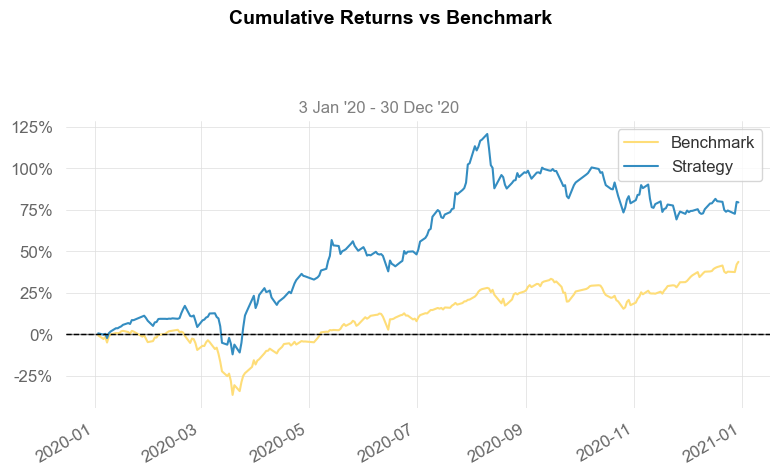

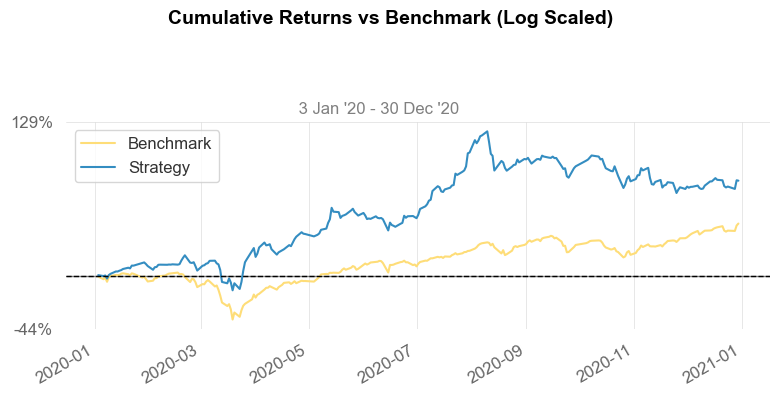

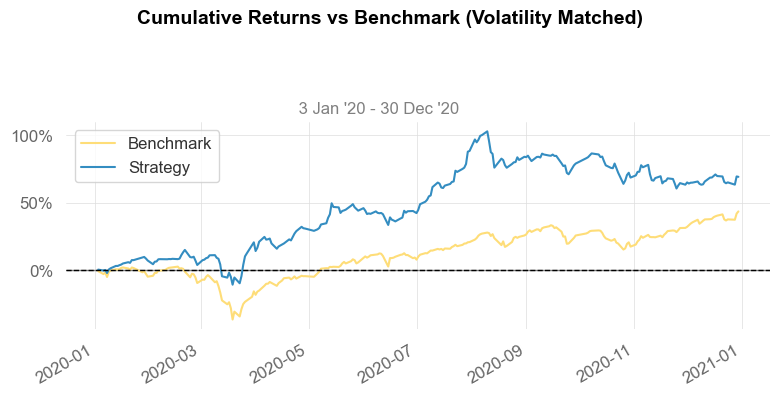

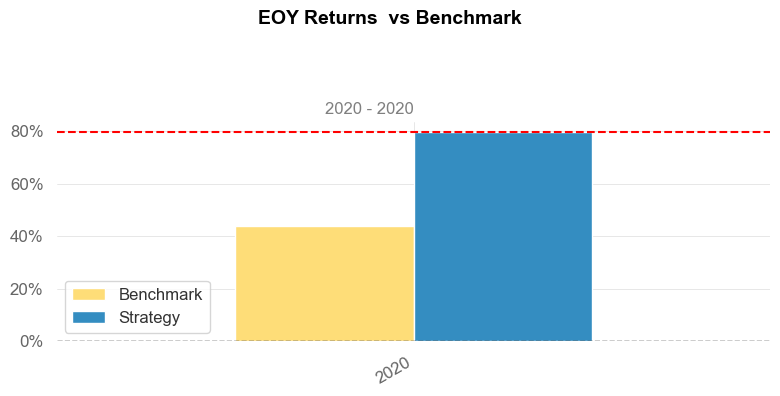

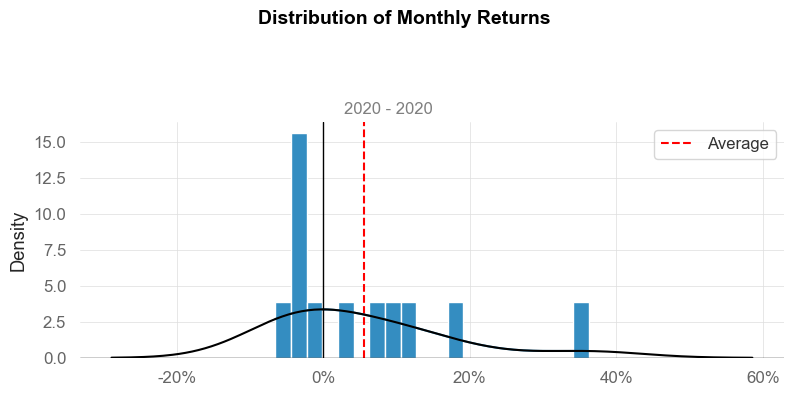

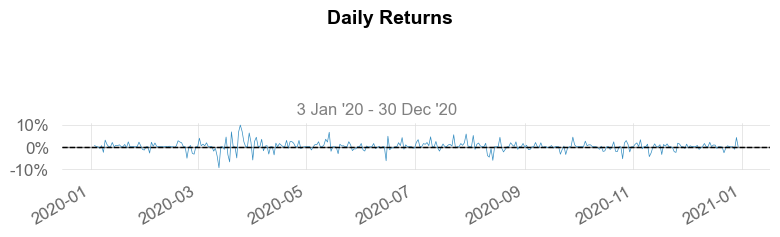

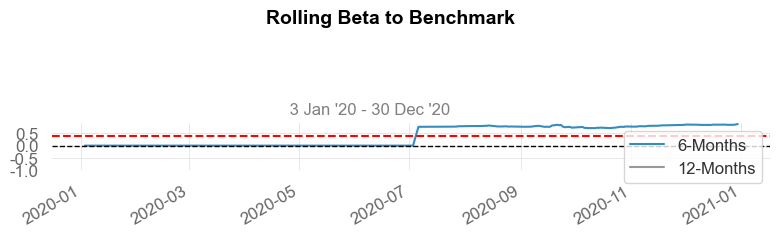

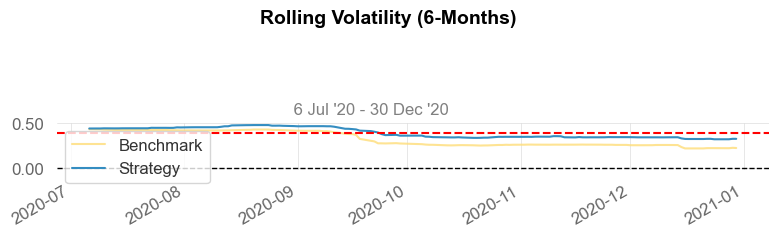

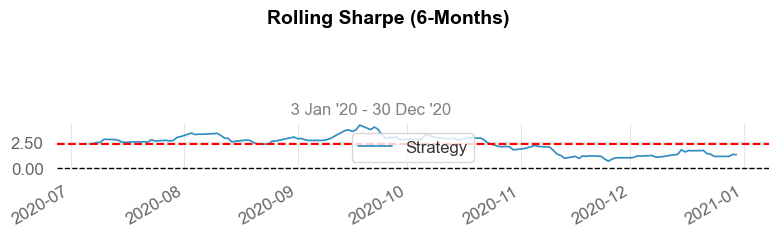

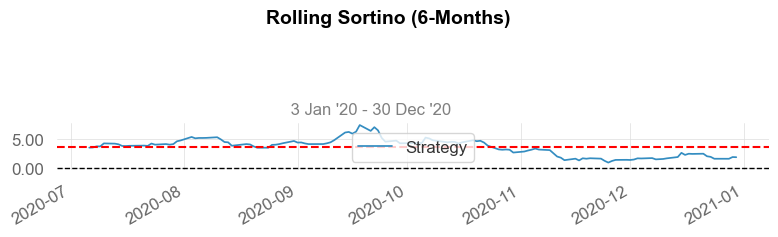

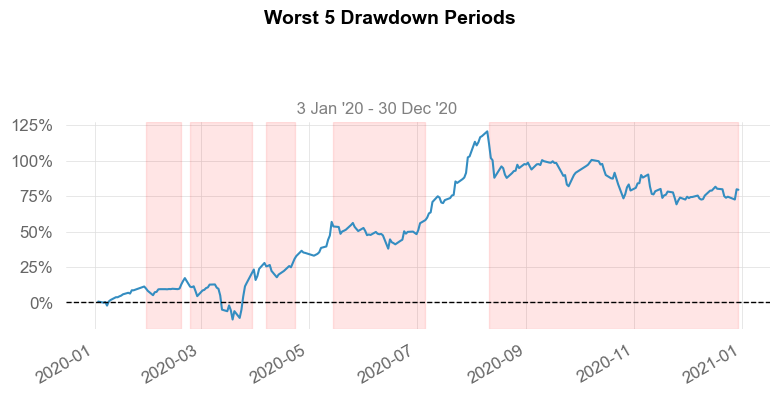

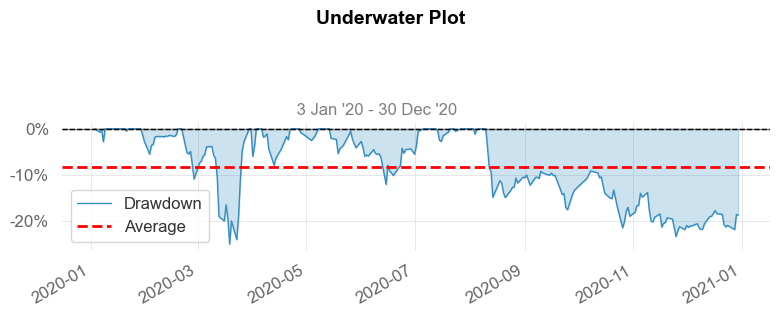

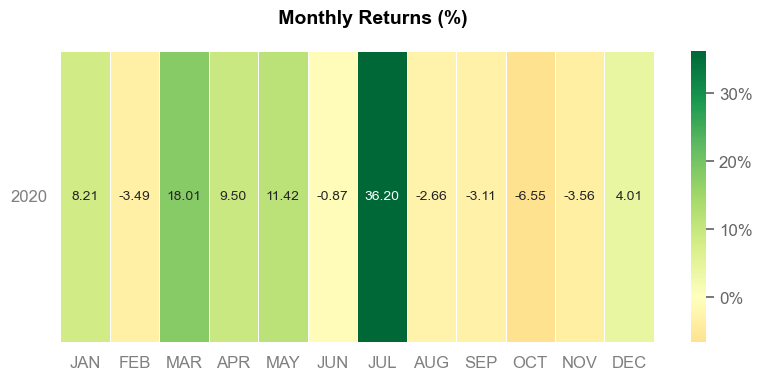

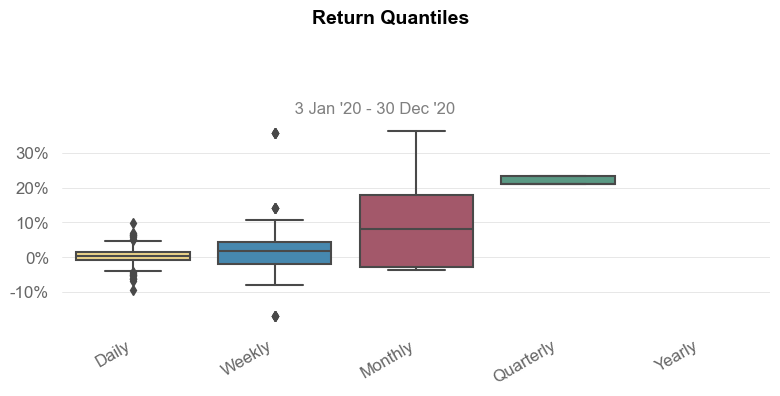

In [45]:

qs.reports.full(top30_2020_pct['포트폴리오 일일수익률'],top30_2020_pct['kosdaq'])